In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ========================
# ==== CONFIG ============
# ========================
results_path = "results_by_state_year"
csv_files = [f for f in os.listdir(results_path) if f.endswith(".csv")]

all_data = []

# ========================
# ==== LOAD & MERGE ======
# ========================
for file in csv_files:
    df = pd.read_csv(os.path.join(results_path, file))
    
    parts = file.replace(".csv", "").split("_")
    year = int(parts[-1])
    state = parts[-2].upper()
    
    df_long = df.melt(id_vars=["Modelo"], var_name="Produto", value_name="MAPE")
    df_long["Ano"] = year
    df_long["Estado"] = state
    all_data.append(df_long)

df_all = pd.concat(all_data, ignore_index=True)

df_all = df_all[df_all["Produto"] != "Unnamed: 0"]

# Remove possíveis infinitos e NaN
df_all = df_all.replace([float("inf"), float("-inf")], pd.NA).dropna(subset=["MAPE"])

# ========================
# ==== STYLE =============
# ========================
sns.set_theme(style="whitegrid", font_scale=1.3)
palette_ano = sns.color_palette("Set2")
palette_prod = sns.color_palette("Dark2")

C:\Users\alex-\AppData\Local\Temp\ipykernel_14720\1585907029.py:5: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


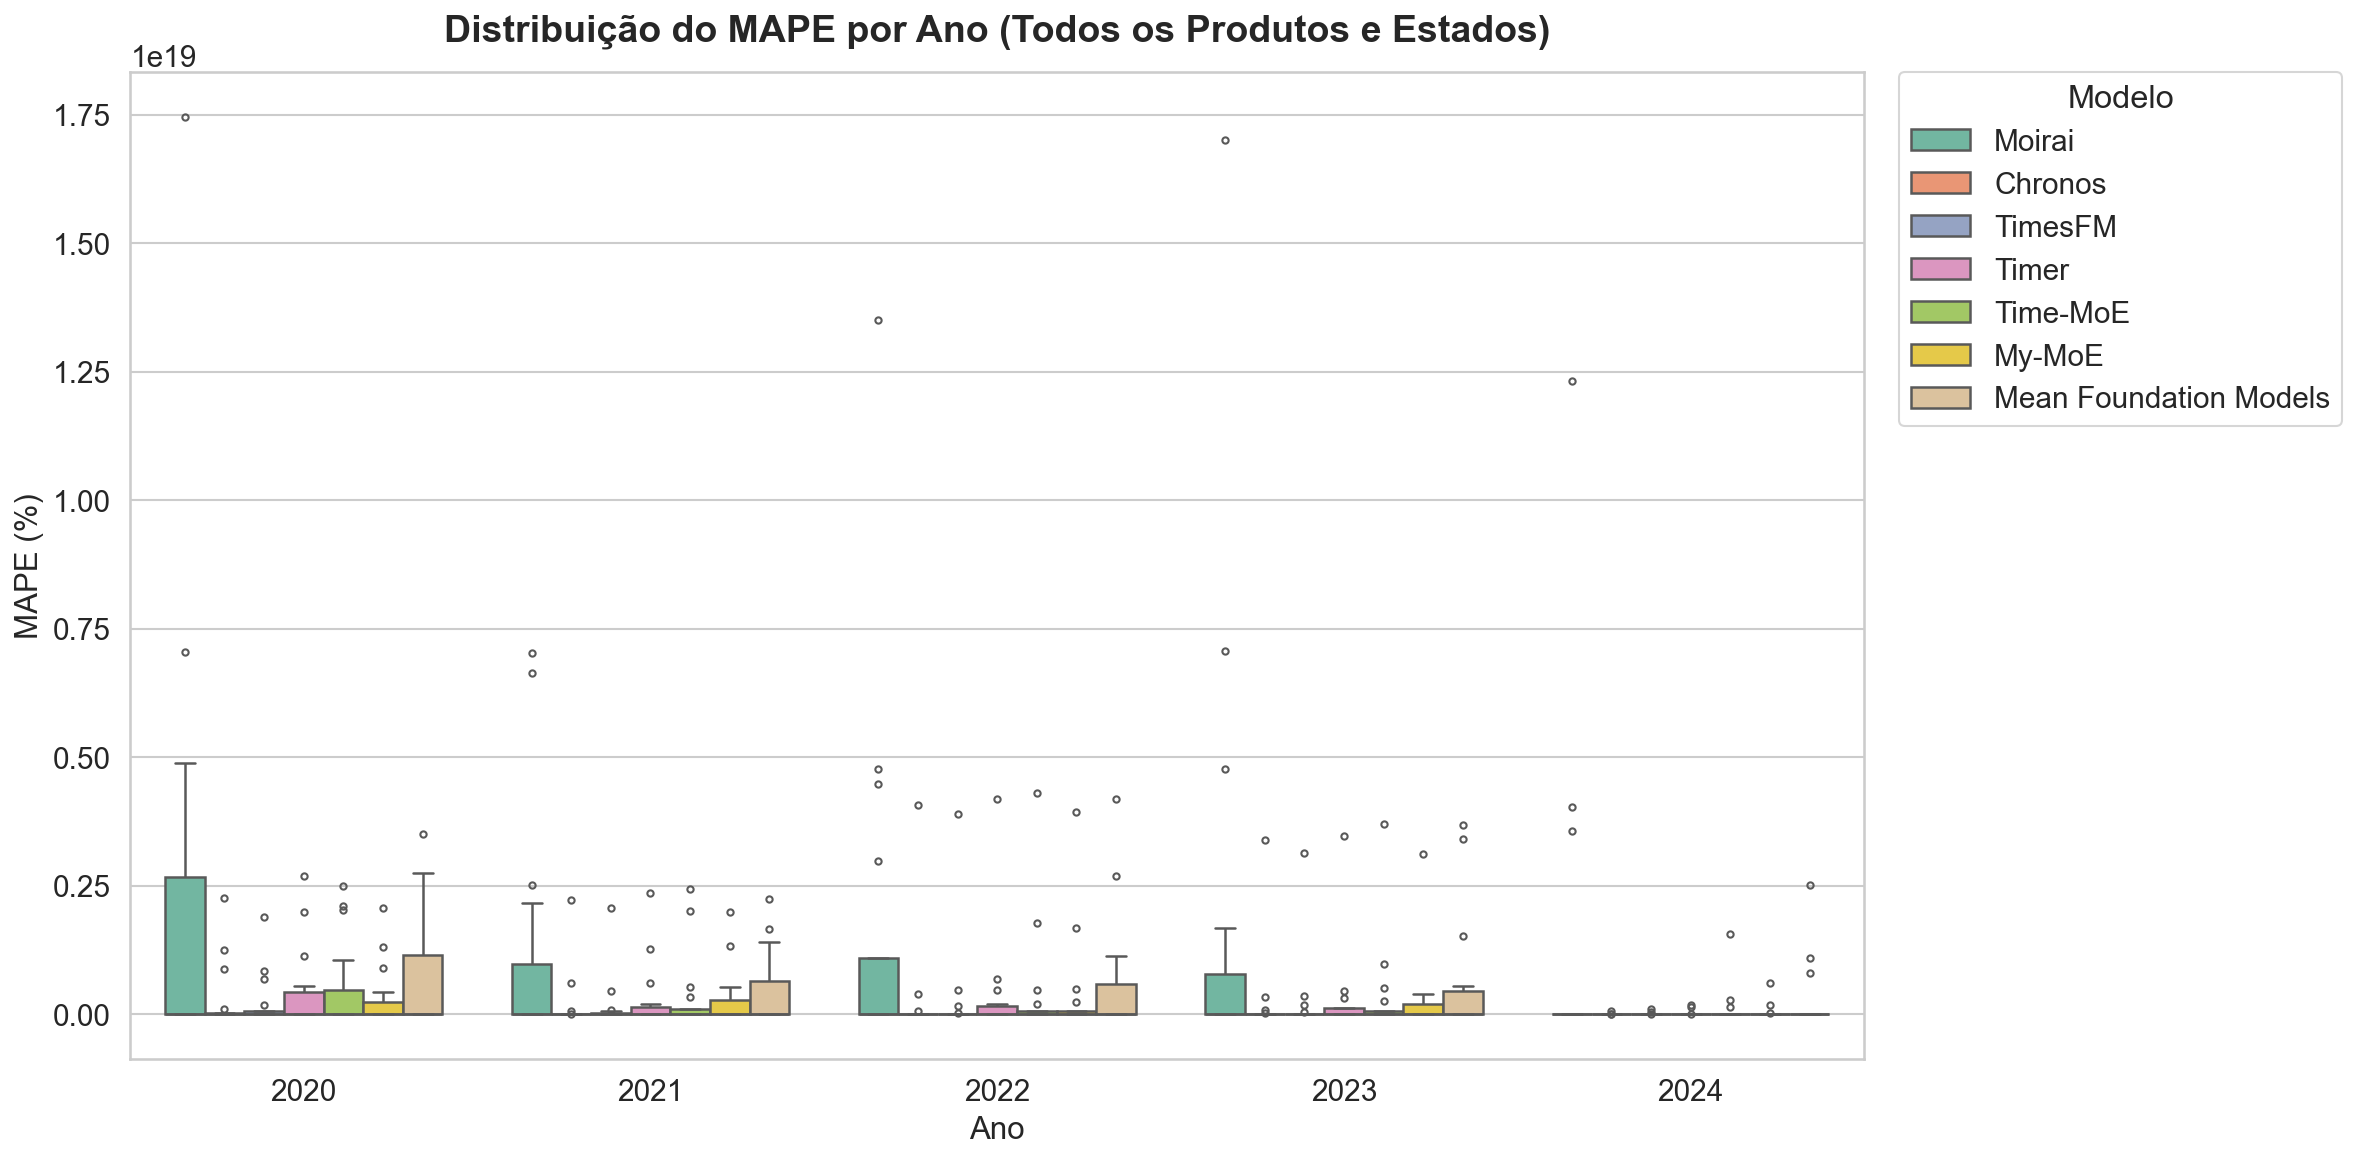

In [2]:
# ========================
# ==== BOXPLOT POR ANO ===
# ========================
fig, ax = plt.subplots(figsize=(16, 8), dpi=150)
sns.boxplot(
    data=df_all,
    x="Ano",
    y="MAPE",
    hue="Modelo",
    palette=palette_ano,
    linewidth=1.2,
    fliersize=3,
    ax=ax
)
ax.set_title("Distribuição do MAPE por Ano (Todos os Produtos e Estados)", fontsize=18, weight="bold", pad=15)
ax.set_xlabel("Ano", fontsize=15)
ax.set_ylabel("MAPE (%)", fontsize=15)
ax.legend(title="Modelo", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()
plt.show()

C:\Users\alex-\AppData\Local\Temp\ipykernel_14720\3563163590.py:10: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


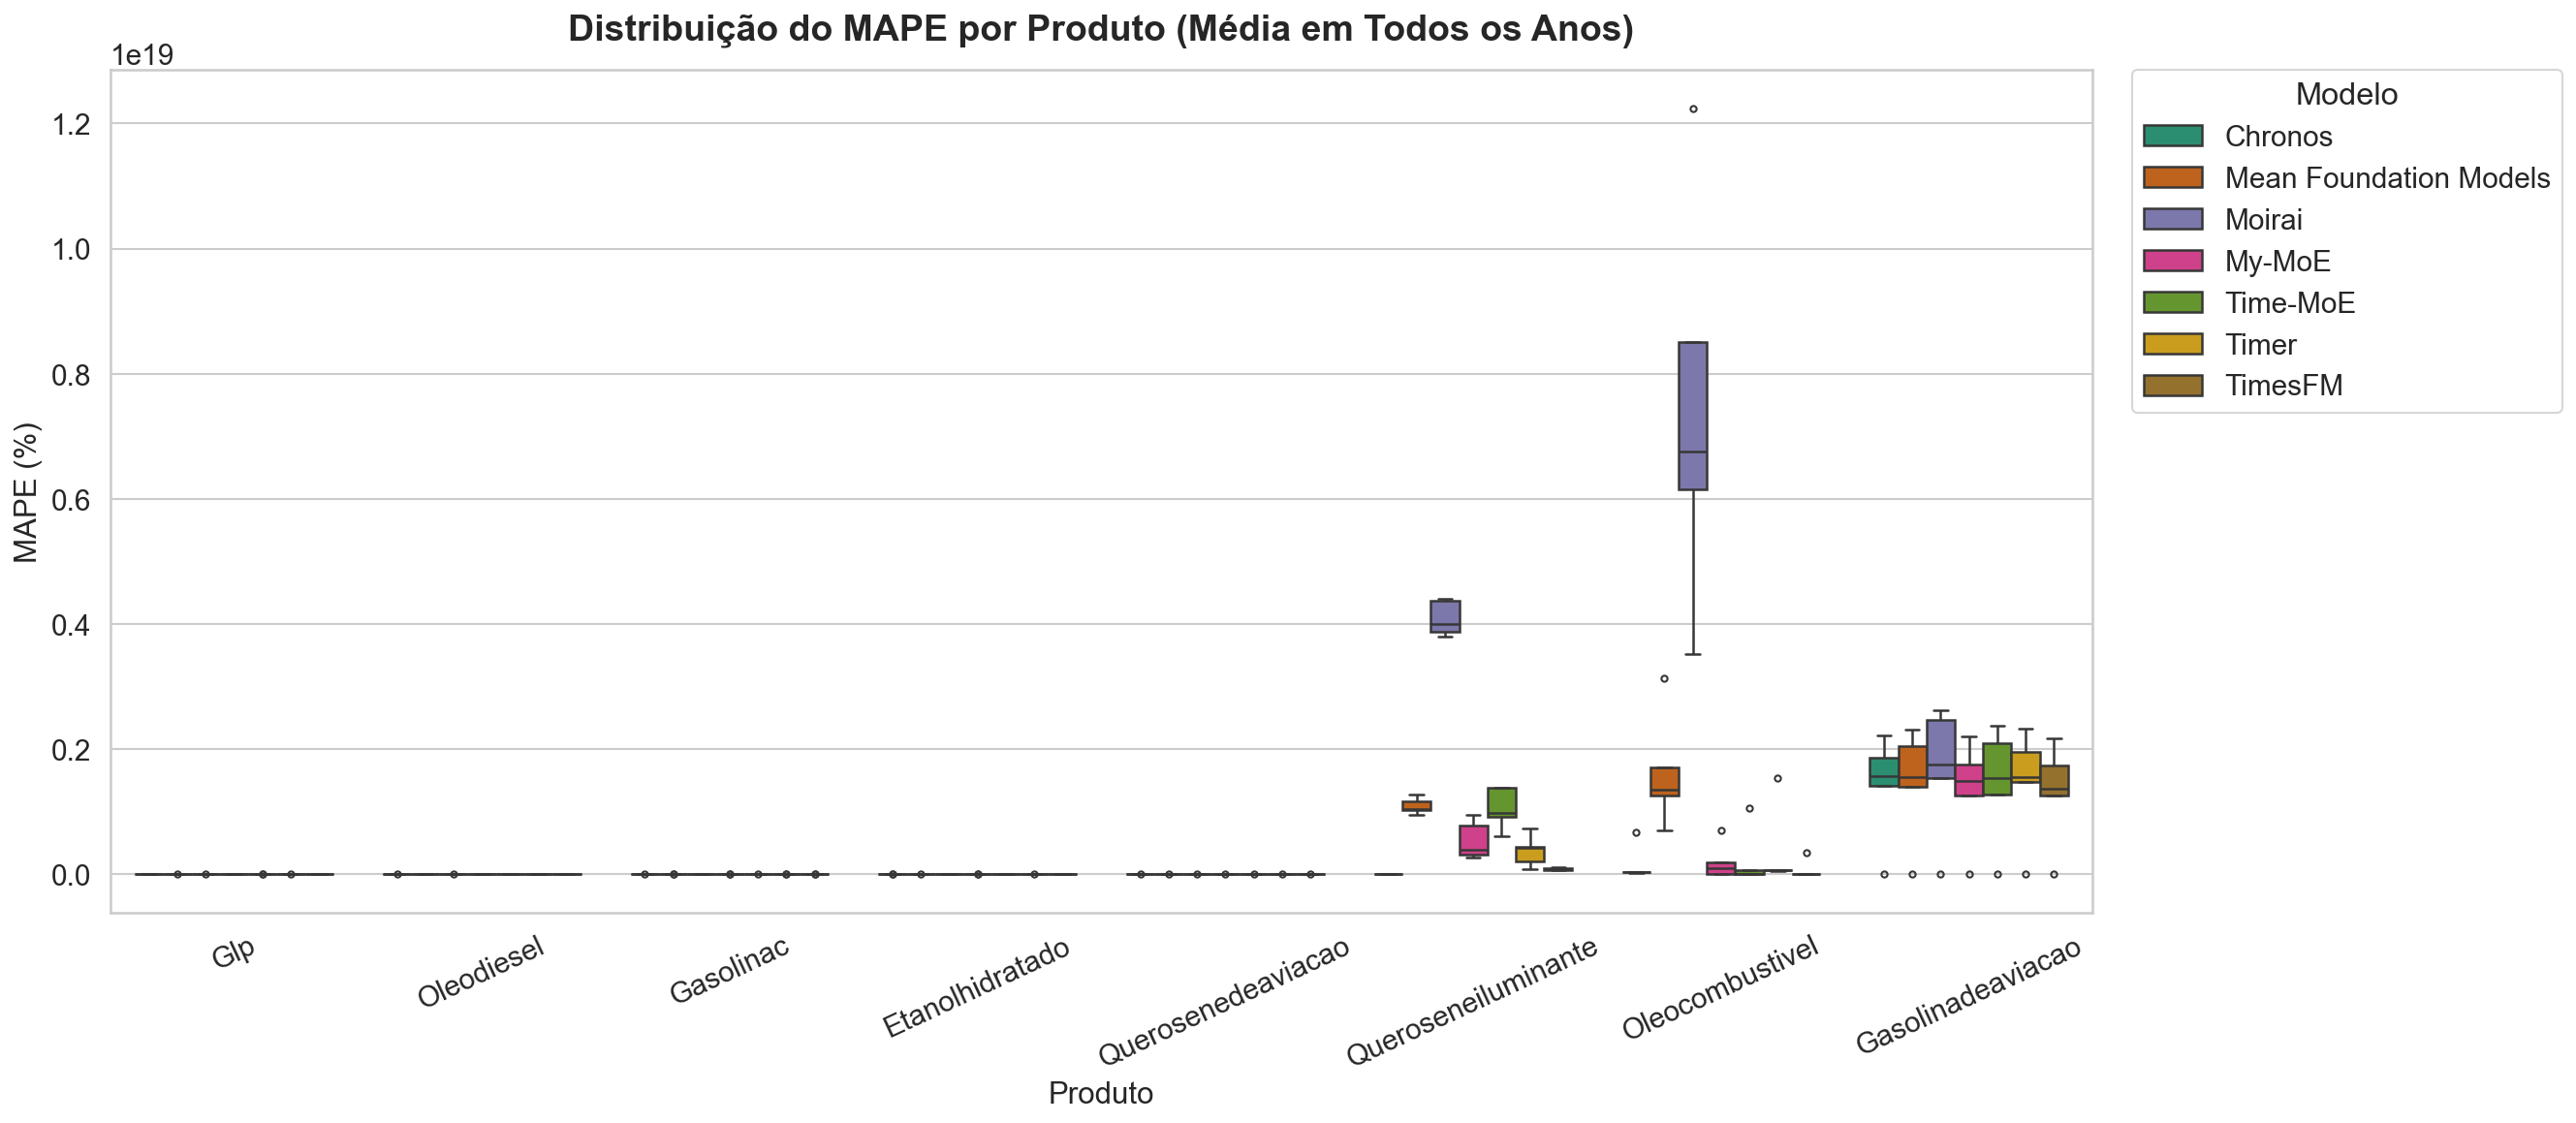

In [3]:
# ================================
# ==== BOXPLOT POR PRODUTO =======
# ================================
df_mean_product = df_all.groupby(["Modelo", "Produto", "Ano"])["MAPE"].mean().reset_index()

# Ordena produtos pela média de MAPE global
product_order = df_mean_product.groupby("Produto")["MAPE"].mean().sort_values().index.tolist()

fig, ax = plt.subplots(figsize=(18, 8), dpi=150)
sns.boxplot(
    data=df_mean_product,
    x="Produto",
    y="MAPE",
    hue="Modelo",
    palette=palette_prod,
    linewidth=1.2,
    fliersize=3,
    order=product_order,
    ax=ax
)
ax.set_title("Distribuição do MAPE por Produto (Média em Todos os Anos)", fontsize=18, weight="bold", pad=15)
ax.set_xlabel("Produto", fontsize=15)
ax.set_ylabel("MAPE (%)", fontsize=15)
ax.tick_params(axis="x", rotation=25)
ax.legend(title="Modelo", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)
plt.tight_layout()
plt.show()

C:\Users\alex-\AppData\Local\Temp\ipykernel_14720\877603500.py:10: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


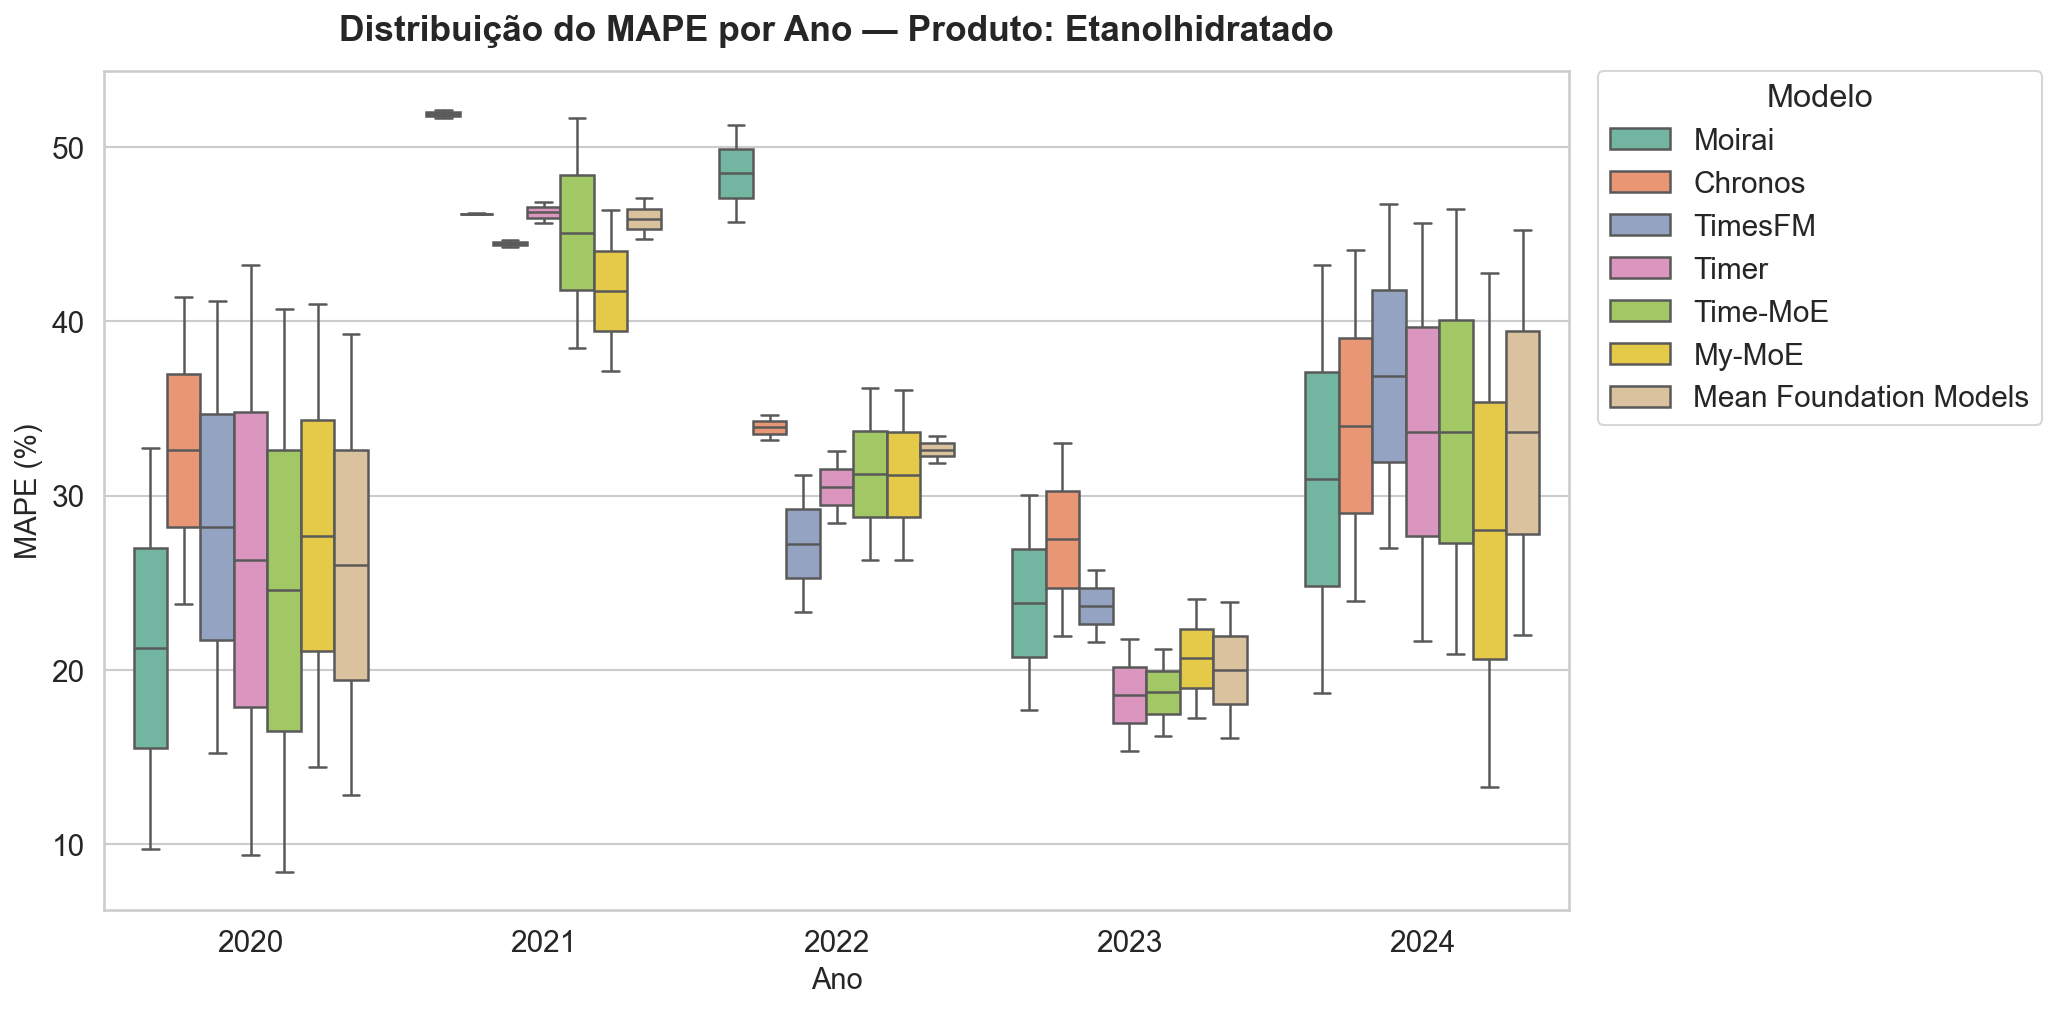

C:\Users\alex-\AppData\Local\Temp\ipykernel_14720\877603500.py:10: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


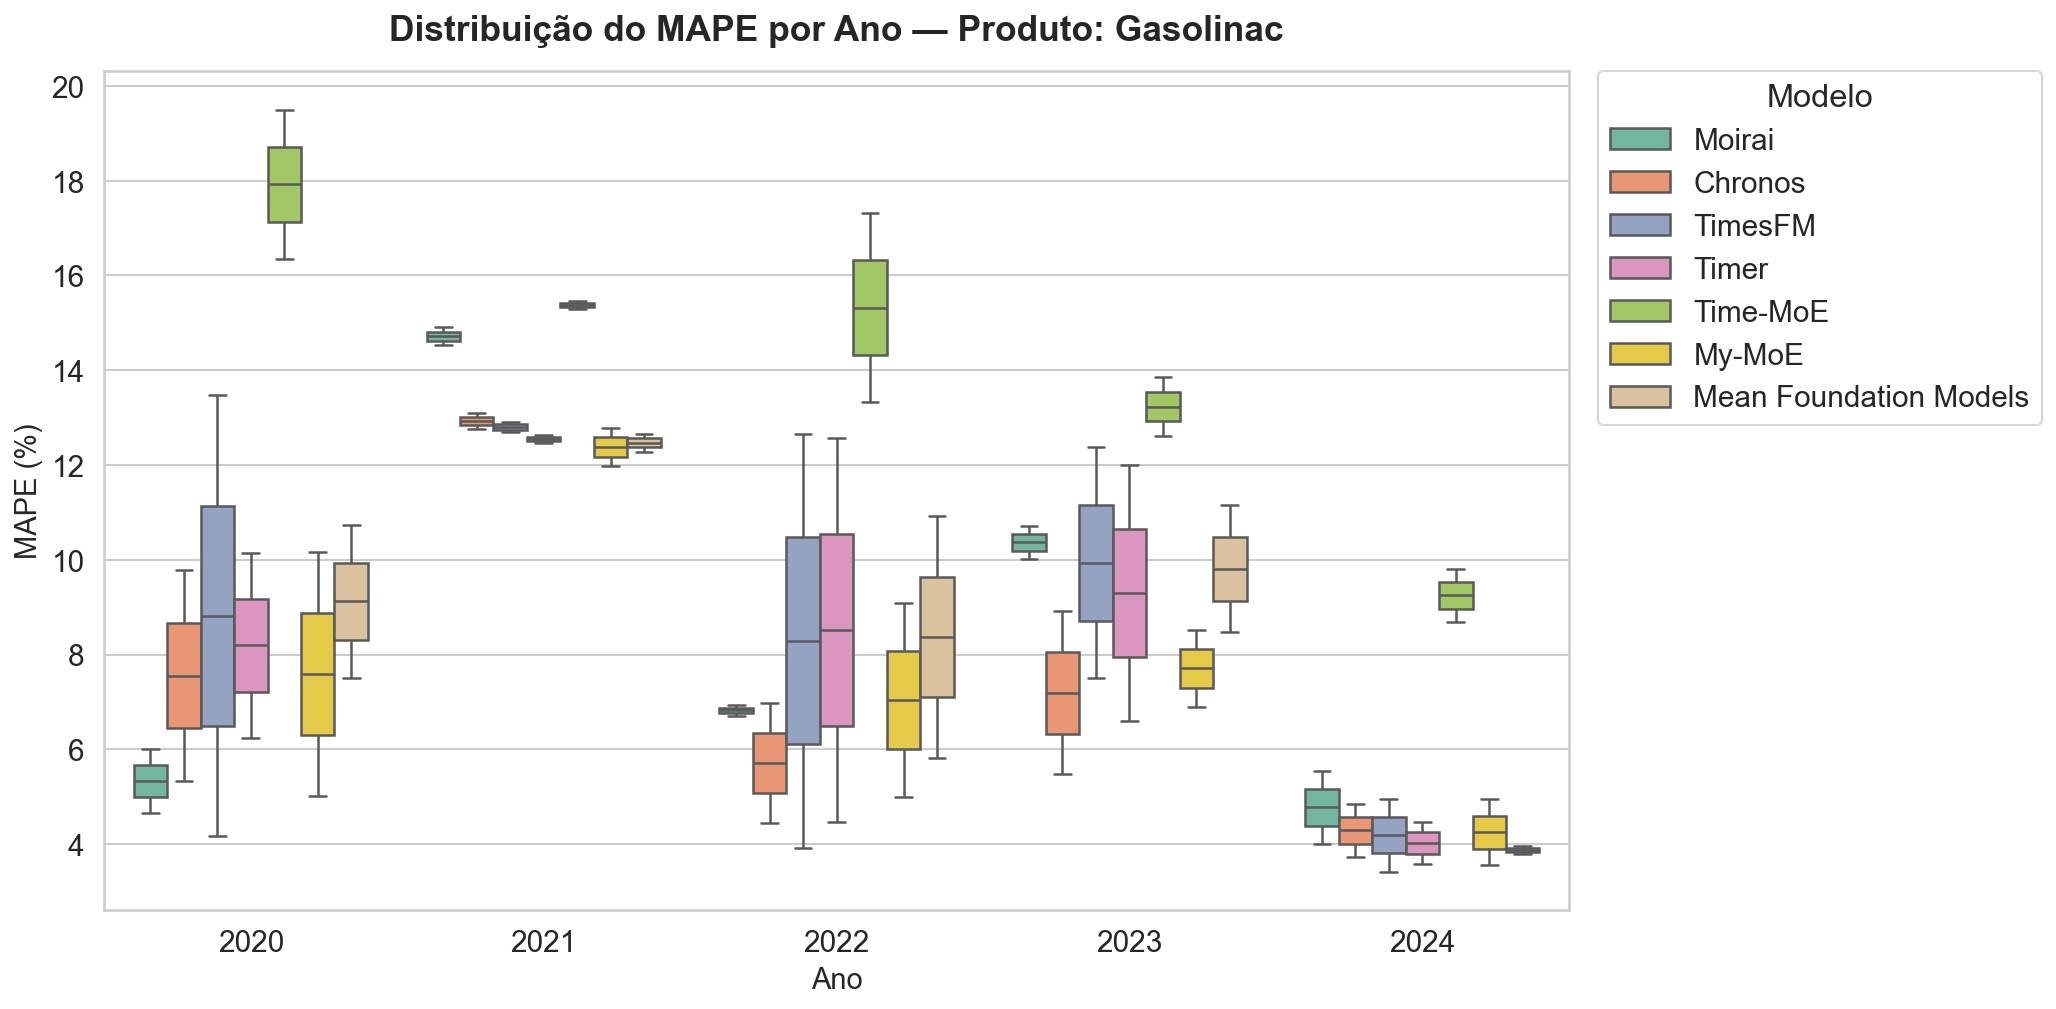

C:\Users\alex-\AppData\Local\Temp\ipykernel_14720\877603500.py:10: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


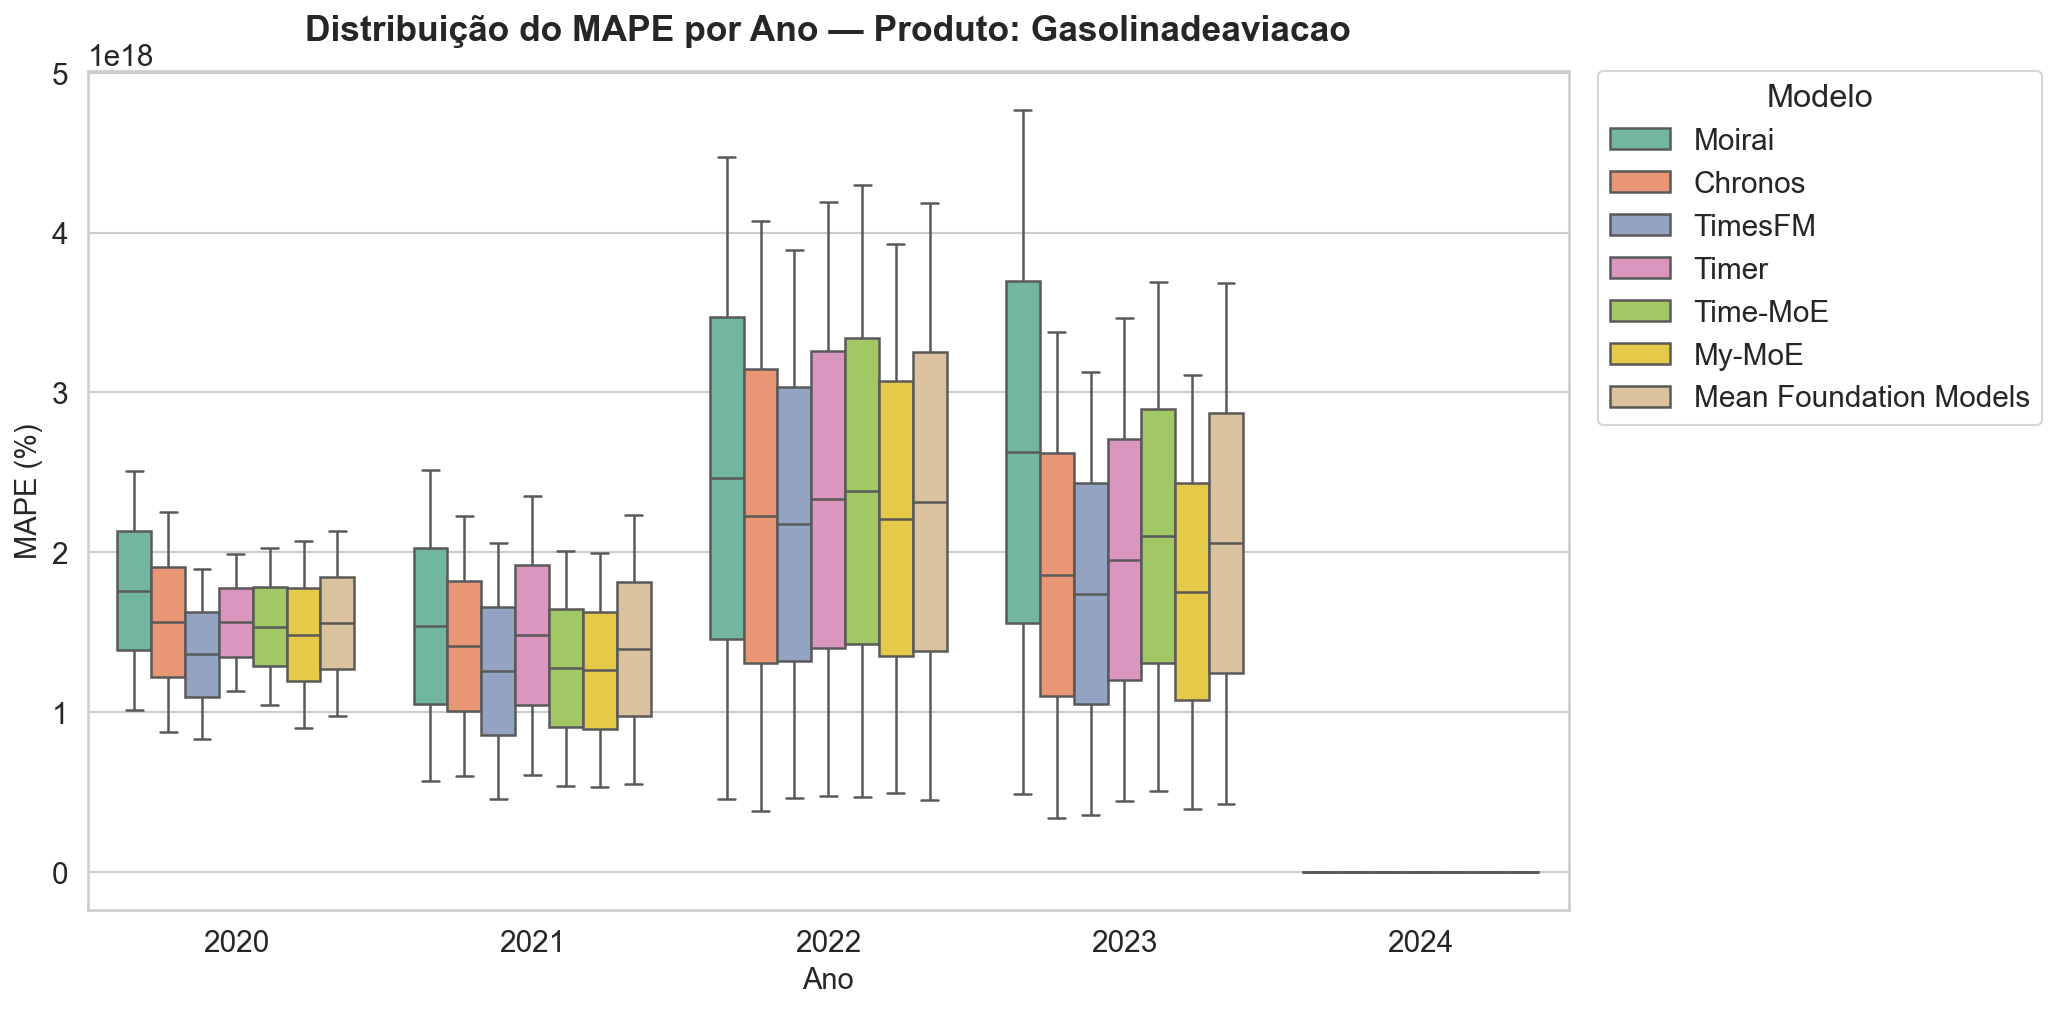

C:\Users\alex-\AppData\Local\Temp\ipykernel_14720\877603500.py:10: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


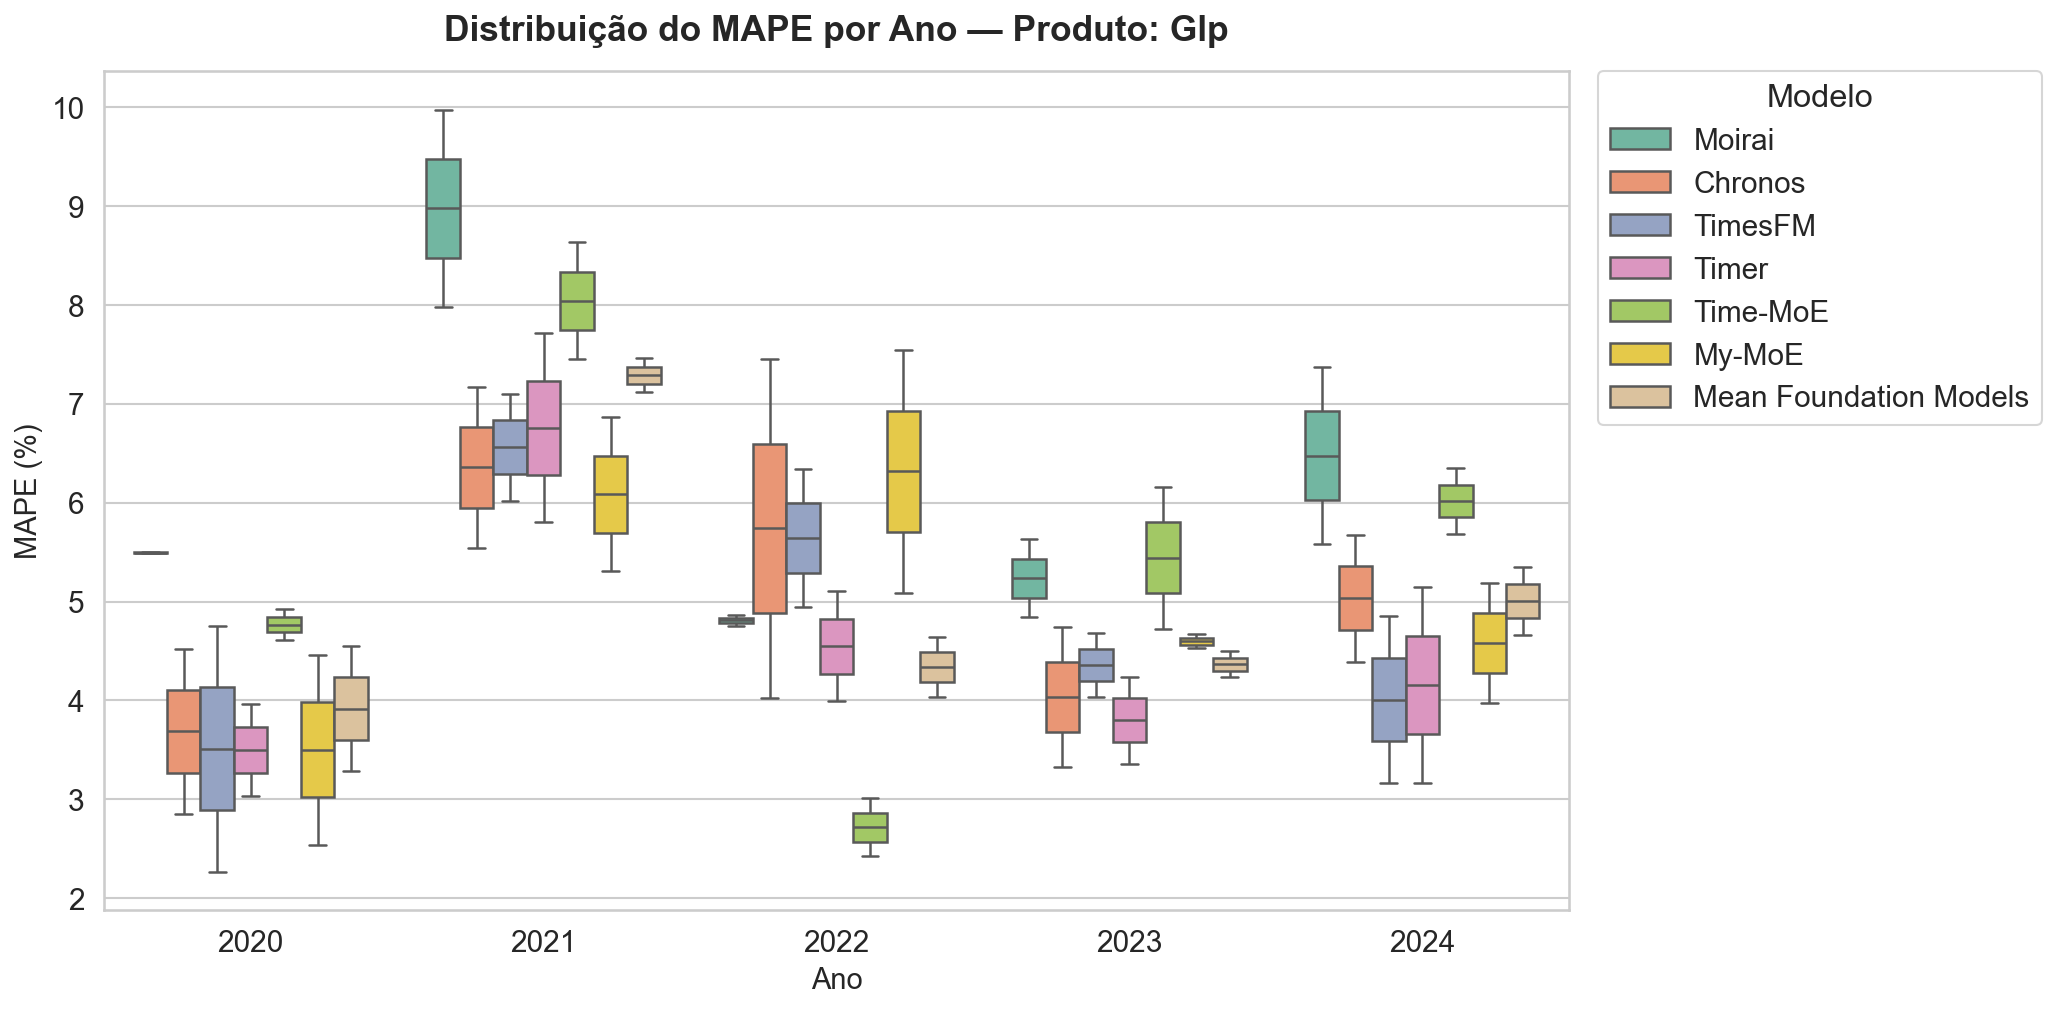

C:\Users\alex-\AppData\Local\Temp\ipykernel_14720\877603500.py:10: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


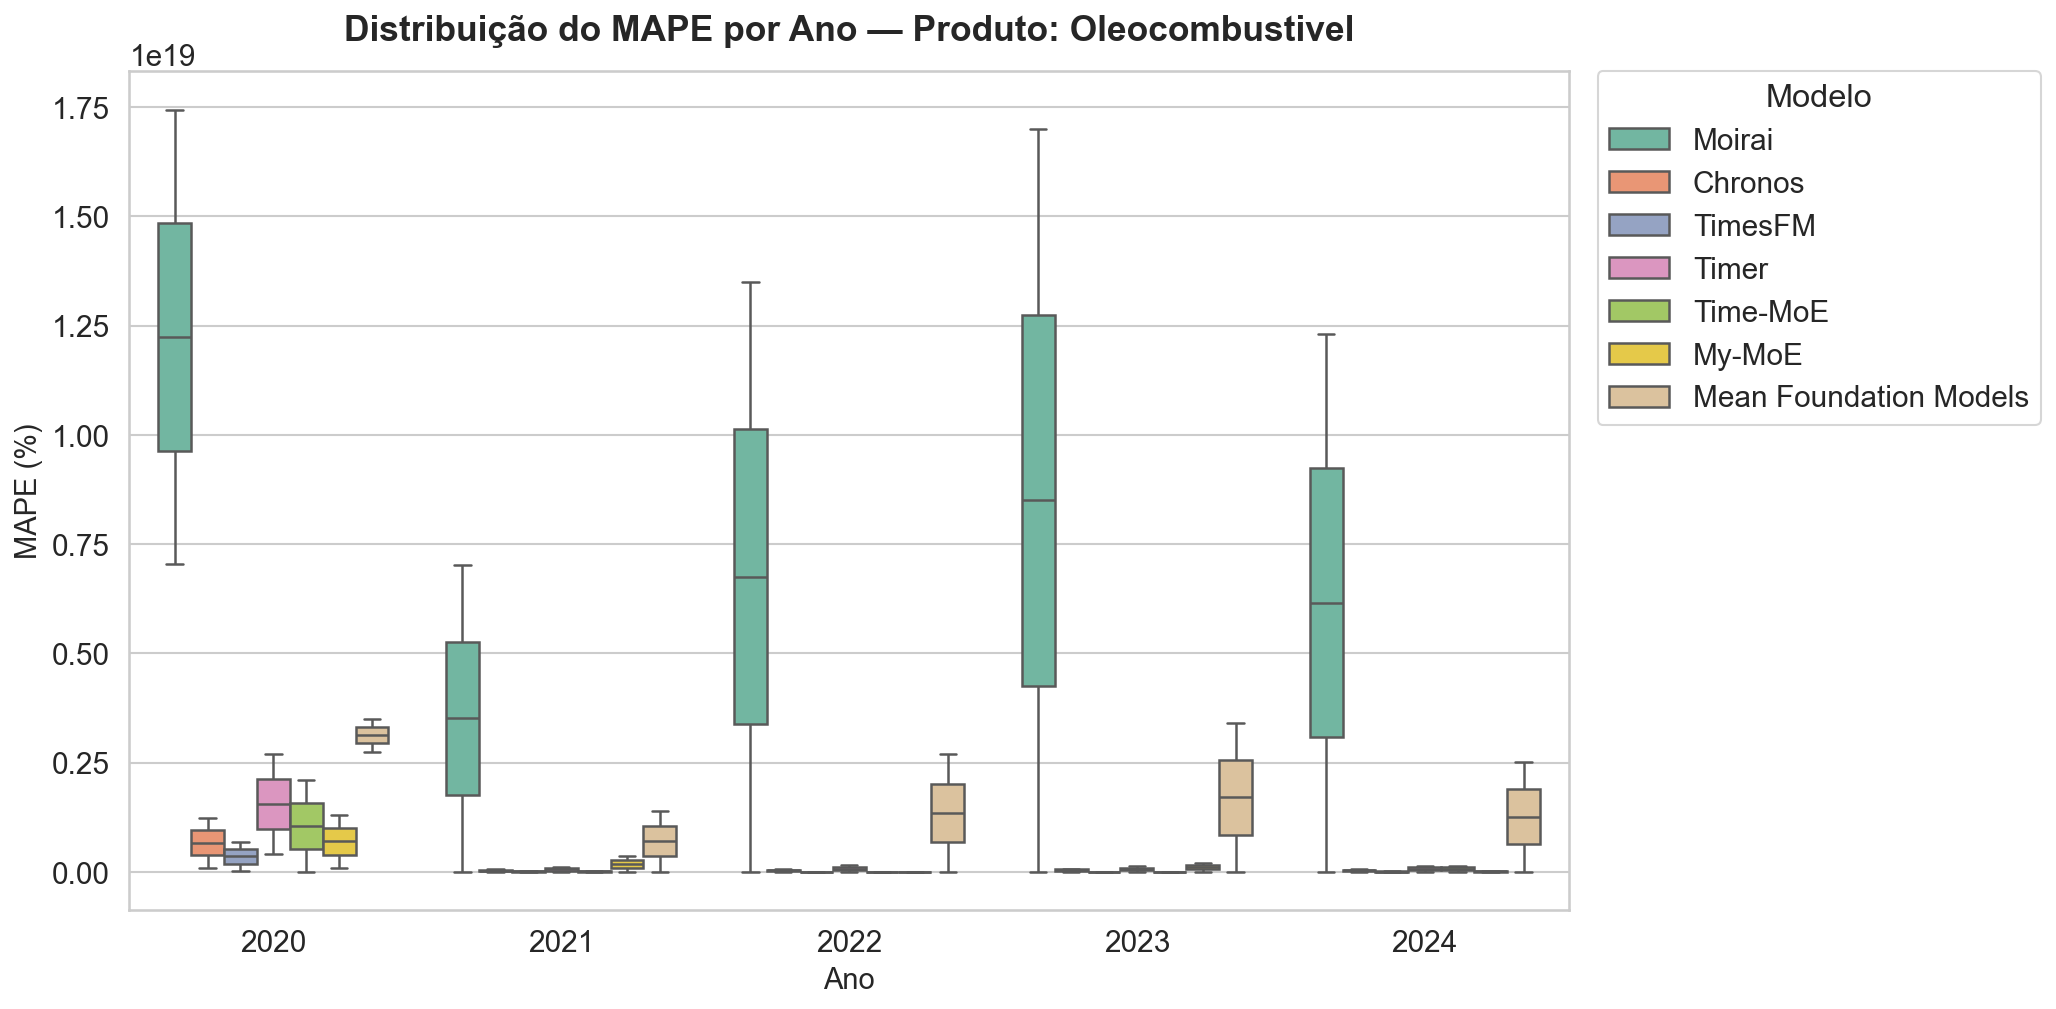

C:\Users\alex-\AppData\Local\Temp\ipykernel_14720\877603500.py:10: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


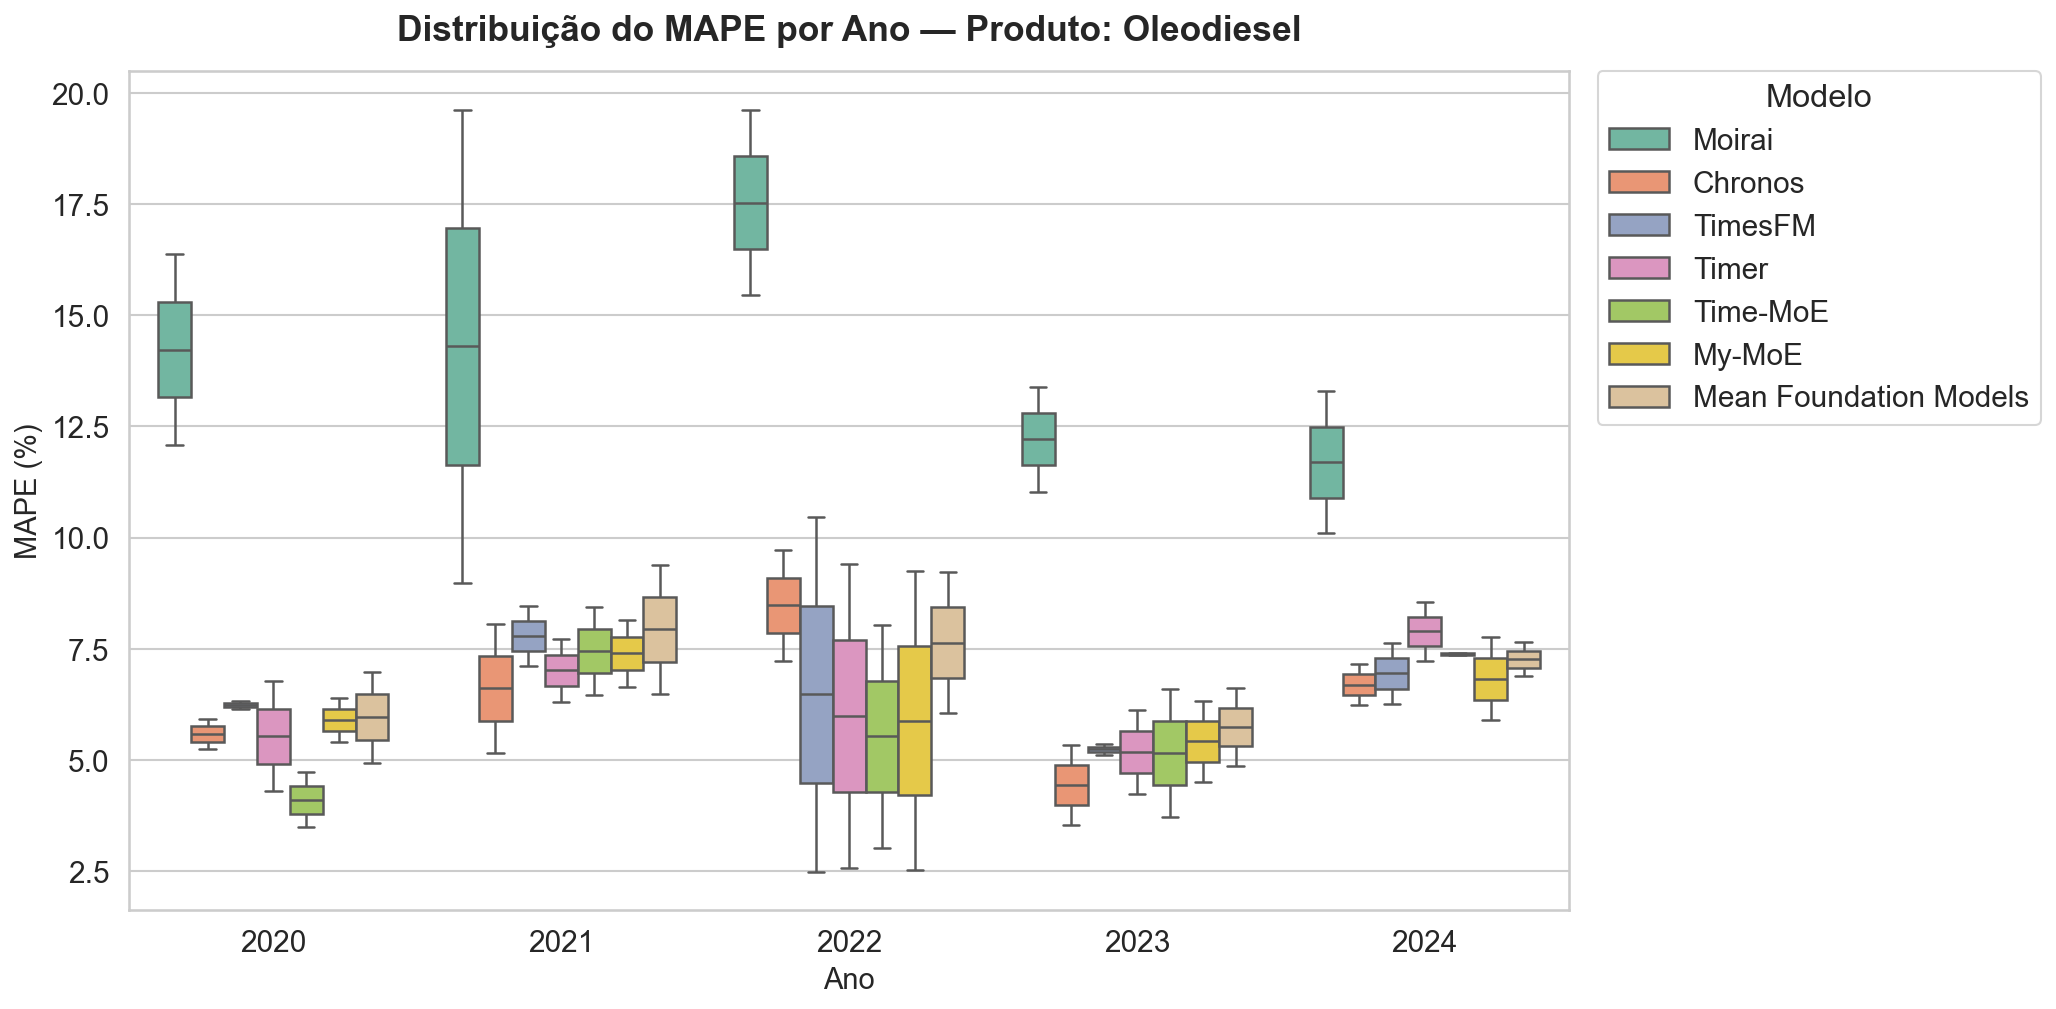

C:\Users\alex-\AppData\Local\Temp\ipykernel_14720\877603500.py:10: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


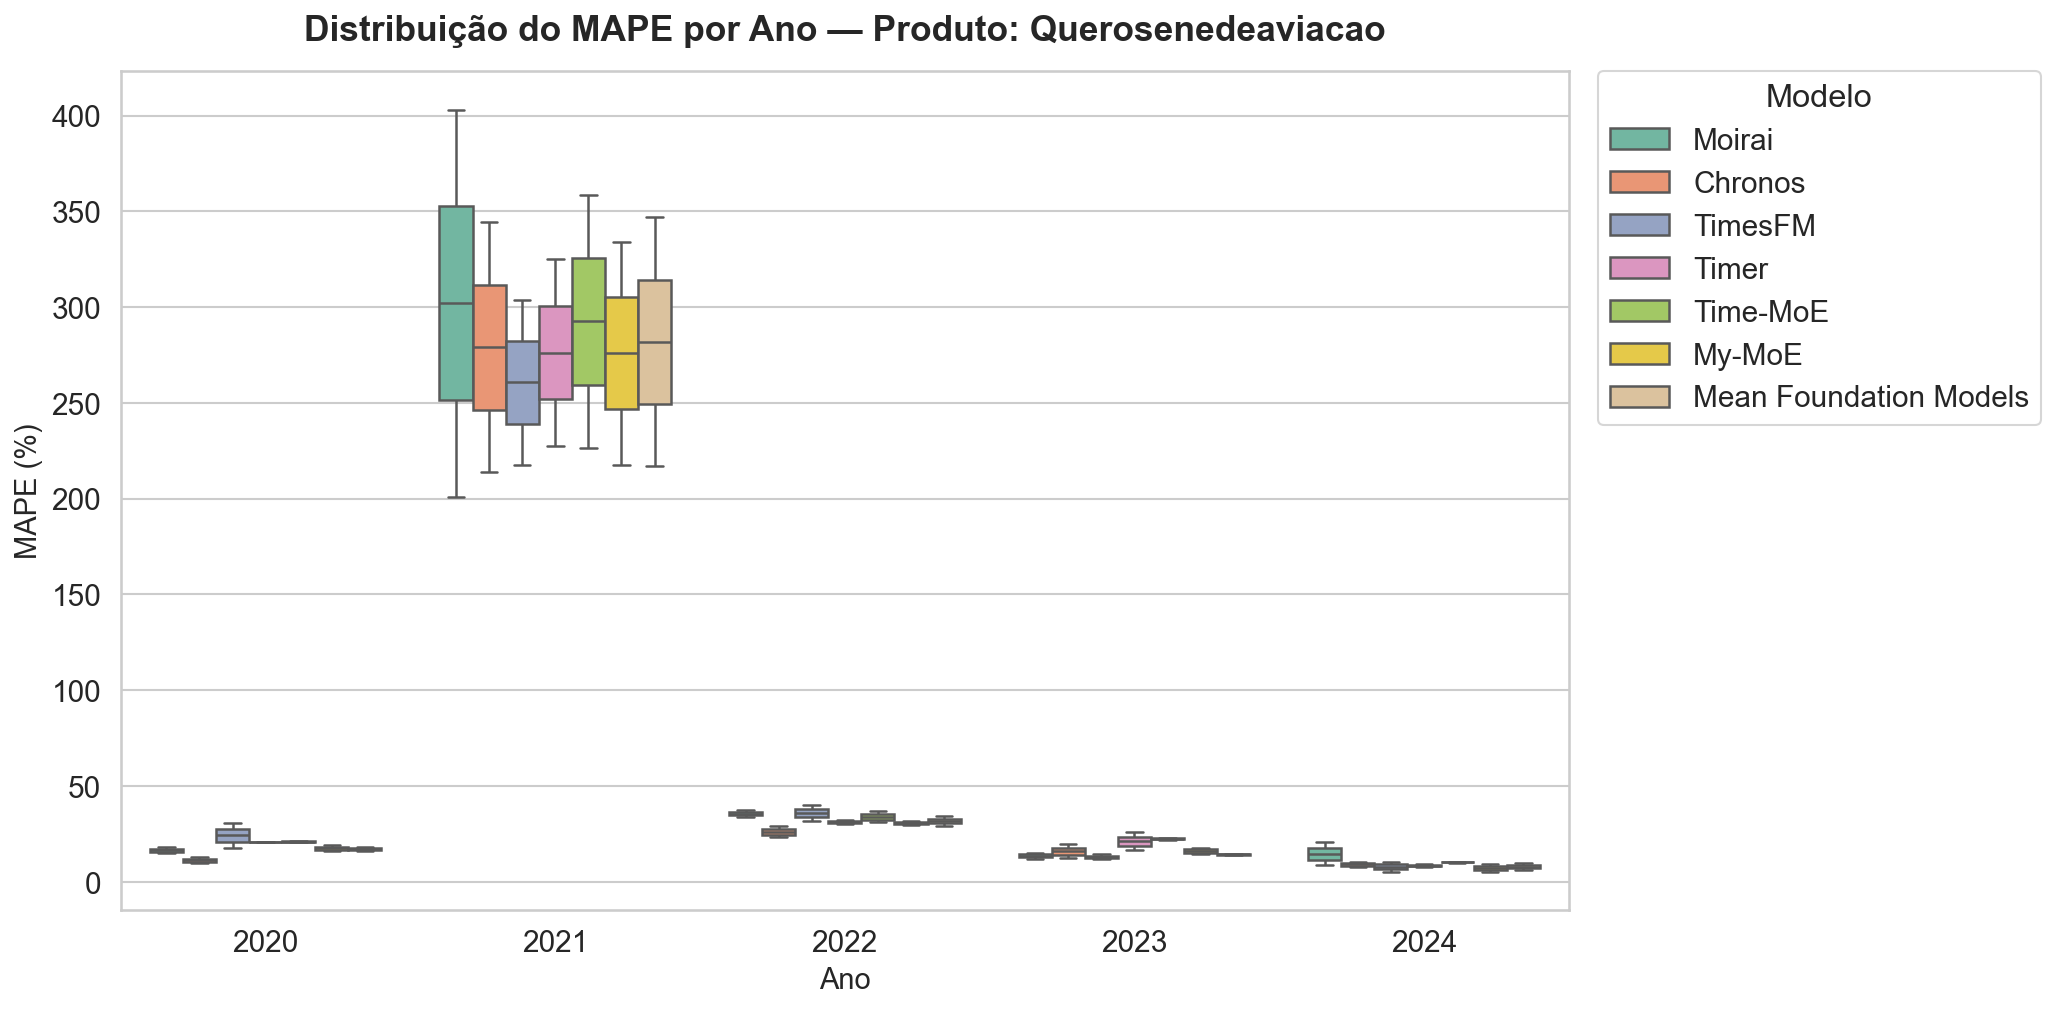

C:\Users\alex-\AppData\Local\Temp\ipykernel_14720\877603500.py:10: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.boxplot(


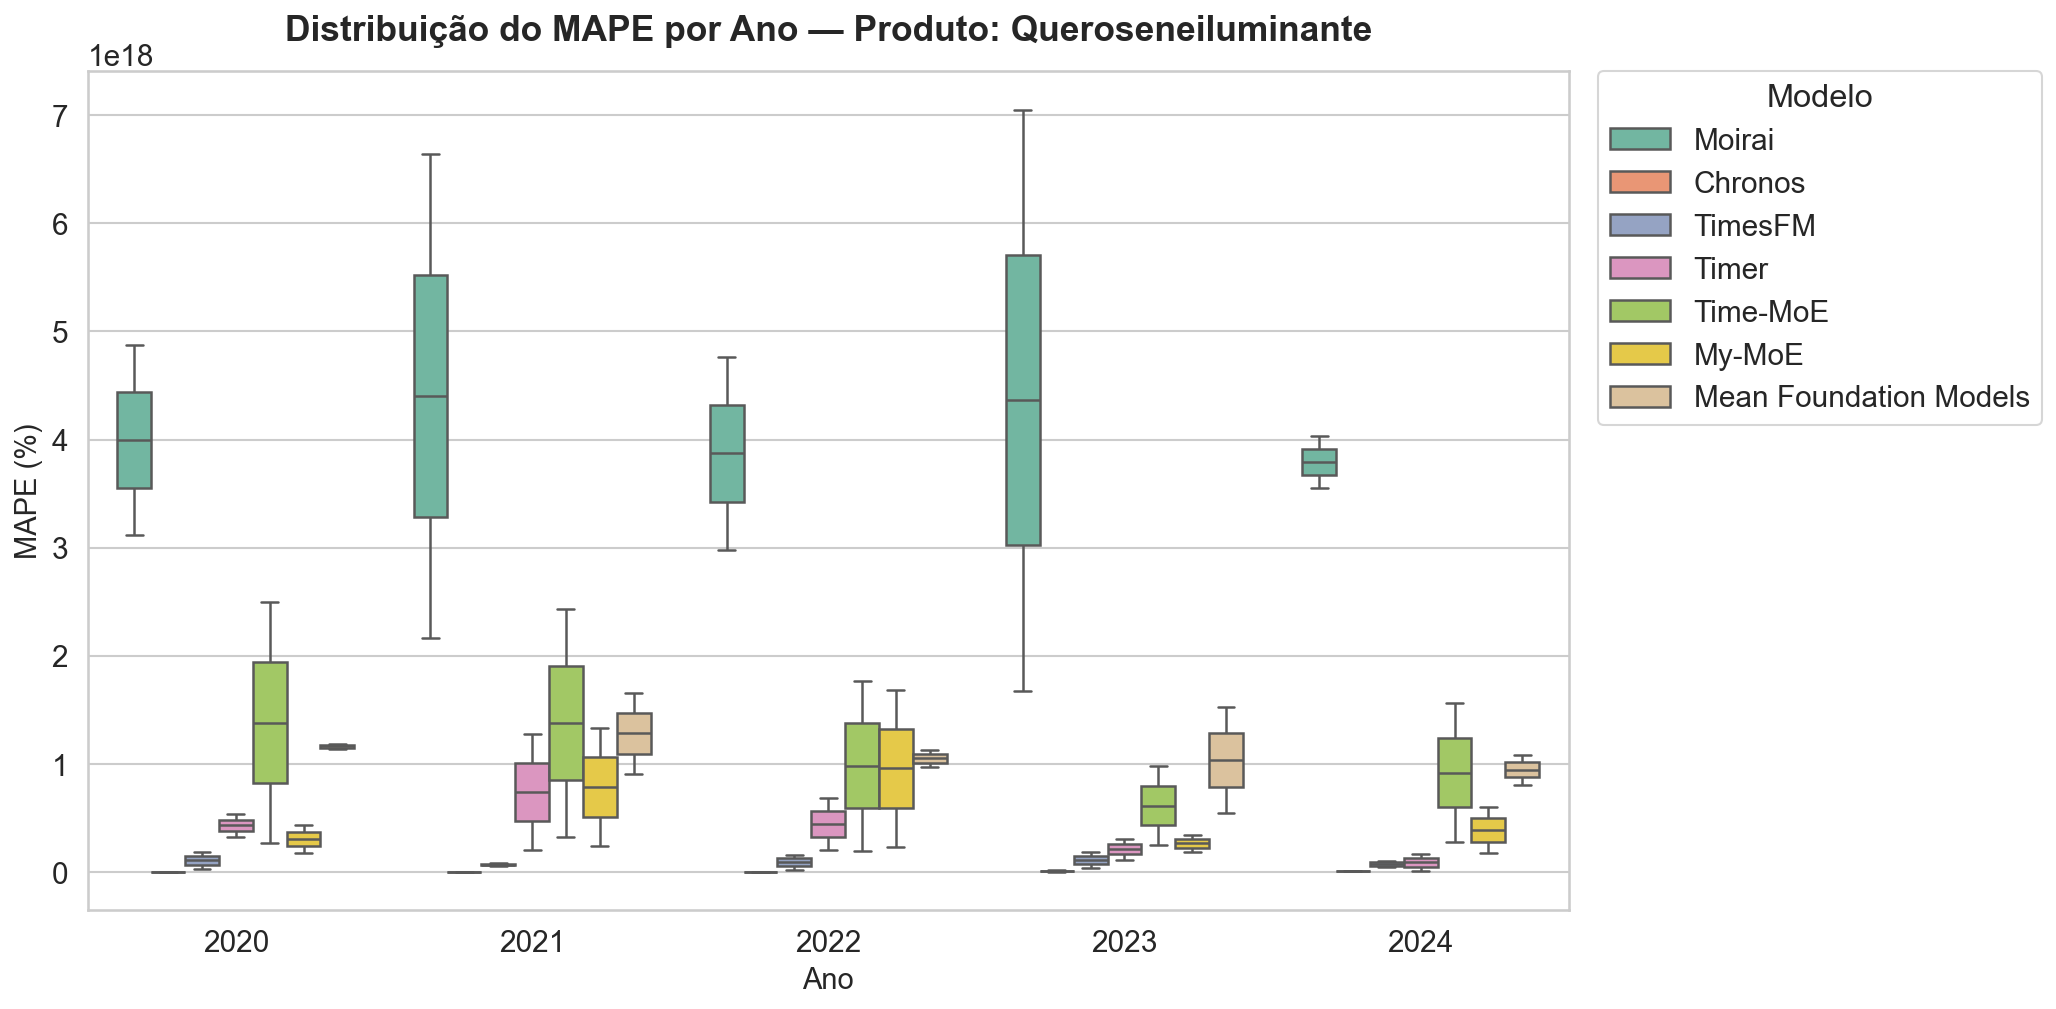

In [5]:
# =========================================
# ==== BOXPLOTS POR PRODUTO (8 GRÁFICOS) ===
# =========================================
unique_products = sorted(df_all["Produto"].unique())

for prod in unique_products:
    df_prod = df_all[df_all["Produto"] == prod]
    
    fig, ax = plt.subplots(figsize=(14, 7), dpi=150)
    sns.boxplot(
        data=df_prod,
        x="Ano",
        y="MAPE",
        hue="Modelo",
        palette=palette_ano,
        linewidth=1.2,
        fliersize=3,
        ax=ax
    )
    ax.set_title(f"Distribuição do MAPE por Ano — Produto: {prod}", fontsize=17, weight="bold", pad=15)
    ax.set_xlabel("Ano", fontsize=14)
    ax.set_ylabel("MAPE (%)", fontsize=14)
    ax.legend(title="Modelo", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)
    plt.tight_layout()
    plt.show()
